# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
# Importando Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o Dataframe

renda_raw = pd.read_csv('previsao_de_renda.csv')
renda_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


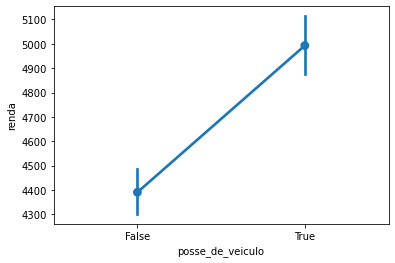

In [6]:
# Gráfico de perfís de médias para a variável posse_de_veiculo

ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=renda_raw, dodge=True, ci = 95)

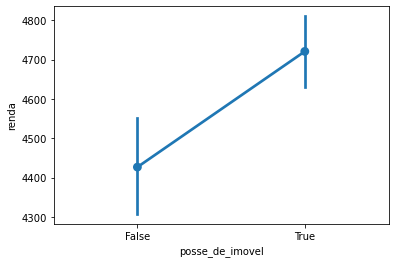

In [7]:
# Gráfico de perfís de médias para a variável posse_de_imovel

ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=renda_raw, dodge=True, ci = 95)

In [16]:
# Aqui criaremos uma nova coluna que também analisará caso o cliente possua ambos imóveis e veículo

renda_raw['posse_ambos'] = np.where((renda_raw['posse_de_veiculo'] == True) & (renda_raw['posse_de_imovel'] == True),
                                    'posse_ambos', 
                                    np.where((renda_raw['posse_de_veiculo'] == True) & (renda_raw['posse_de_imovel'] == False),
                                    'apenas_veiculo', 
                                    np.where((renda_raw['posse_de_veiculo'] == False) & (renda_raw['posse_de_imovel'] == True),
                                    'apenas_imovel', 
                                    'nao_possui')))

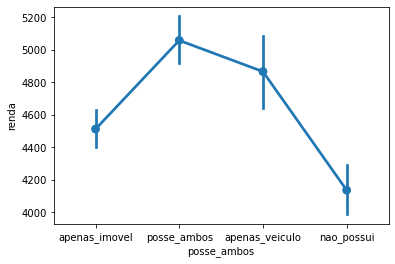

In [17]:
ax = sns.pointplot(x="posse_ambos", y="renda",
                   data=renda_raw, dodge=True, ci = 95)

**Análise**: No gráfico **posse_de_veiculo** x **renda** percebemos que a variável **posse_de_veiculo** é uma boa preditora para a variável **renda**, no gráfico **posse_de_imovel** x **renda** também concluímos que a variável **posse_de_imovel** é uma boa preditora para a variável **renda**, mas um pouco menos estatisticamente significante do que a variável **posse_de_veiculo**.

Ao combinarmos as variáveis **posse_de_veiculo** e **posse_de_imovel** criando uma variável chamada **posse_ambos**, encontramos uma variável que é uma boa preditora para a variável **renda** e mais estatisticamente significante que as variáveis **posse_de_veiculo** e **posse_de_imovel** analisadas separadamente.